Create a `Booz_xform` instance:

In [1]:
import booz_xform as bx
b = bx.Booz_xform()

If desired, we can set the input data directly from python, without a VMEC file:

In [2]:
b.rmnc = [[1, 0.1], [1.1, 0.2]]

Or, we can load in data from a VMEC `wout_*.nc` file:

In [3]:
b.read_wout("tests/test_files/wout_li383_1.4m.nc")

We now have access to all the data that was loaded, in the form of numpy arrays:

In [4]:
b.rmnc

array([[ 1.47265784e+00,  1.47064413e+00,  1.46876563e+00, ...,
         1.38298775e+00,  1.38106309e+00,  1.37915239e+00],
       [ 9.66386163e-02,  9.39656679e-02,  9.12856961e-02, ...,
         8.39222860e-04, -1.15483564e-03, -3.14856274e-03],
       [ 5.94466624e-03,  5.33733834e-03,  4.72596296e-03, ...,
        -3.90319604e-03, -3.99352196e-03, -4.08841769e-03],
       ...,
       [ 3.82105109e-07,  1.56748891e-06,  4.30513328e-06, ...,
        -4.47161579e-07, -4.73285221e-07, -2.08934612e-07],
       [-3.72242588e-07, -2.86176654e-06, -6.26756380e-06, ...,
        -7.09993720e-06, -4.03495548e-06, -1.29908981e-06],
       [ 7.68276658e-08, -7.96425120e-08,  7.05128633e-08, ...,
        -9.91504287e-06, -6.37379506e-06, -2.21053463e-06]])

We can set the desired Fourier resolution:

In [5]:
b.mboz = 54
b.nboz = 32

The transformation to Boozer coordinates will be run on all flux surfaces by default. If desired, we can select only specific surfaces:

In [6]:
print("Default surfaces:", b.compute_surfs)
b.compute_surfs = [0, 1, 2, 23, 47]
print("Selected surfaces:", b.compute_surfs)

Default surfaces: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Selected surfaces: [ 0  1  2 23 47]


Now, run the calculation.

In [7]:
b.run()

All of the output data are now available as numpy arrays:

In [8]:
b.bmnc_b

array([[ 1.54860454e+00,  1.54995067e+00,  1.55126119e+00,
         1.60164563e+00,  1.68603124e+00],
       [ 4.76751287e-04,  2.52763362e-04,  1.02340154e-04,
        -1.06088199e-03,  3.35055745e-03],
       [ 4.55391623e-04,  2.91930336e-04,  1.55133171e-04,
        -1.24795854e-03, -1.46200165e-03],
       ...,
       [-4.75912238e-16,  1.34267428e-16,  1.03266022e-16,
         1.96786082e-16,  2.22042269e-12],
       [-3.33107565e-16, -1.97079156e-16, -4.52095365e-17,
        -2.00845700e-16,  8.16904959e-13],
       [-7.15099095e-17, -1.25428639e-17,  1.70490792e-16,
         1.08711597e-16,  3.86347018e-13]])

The python module includes routines for plotting the results:

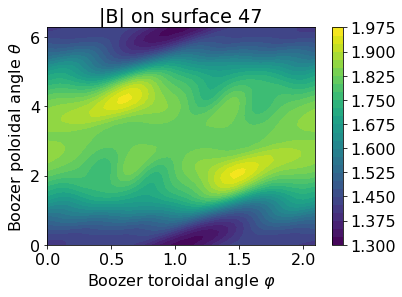

In [9]:
bx.surfplot(b, js=4)

If desired, results can be saved to a `boozmn_*.nc` NetCDF file:

In [10]:
b.write_boozmn("boozmn_li383_1.4m.nc")

Results from this new `booz_xform` module are identical to the old fortran77 version to machine precision:

In [11]:
import numpy as np
from scipy.io import netcdf
# Load reference data generated by the F77 version
f = netcdf.netcdf_file("tests/test_files/boozmn_li383_1.4m.nc", mmap=False)
bmnc_b_old = f.variables["bmnc_b"][()].transpose()
print("Difference between fortran and C++/python:", np.max(np.abs(bmnc_b_old - b.bmnc_b)))
f.close()

Difference between fortran and C++/python: 1.021405182655144e-14
